<a href="https://colab.research.google.com/github/MayankRawat06/Vehicle-Insurance-Claim-Fraud-Detection/blob/main/fd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

In [ ]:
claim = pd.read_csv('Train_Claim.csv', na_values = "?")
demographics= pd.read_csv('Train_Demographics.csv', na_values = "?")
policy = pd.read_csv('Train_Policy.csv', na_values = "?")
vehicle = pd.read_csv('Train_Vehicle.csv', na_values = "?")
data = pd.read_csv('Traindata_with_Target.csv', na_values = "?")

In [ ]:
claim.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')

In [ ]:
claim.shape

(28836, 19)

In [ ]:
demographics.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country'],
      dtype='object')

In [ ]:
demographics.shape

(28836, 10)

In [ ]:
policy.columns

Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'CustomerID'],
      dtype='object')

In [ ]:
policy.shape

(28836, 10)

In [ ]:
vehicle.columns

Index(['CustomerID', 'VehicleAttribute', 'VehicleAttributeDetails'], dtype='object')

In [ ]:
vehicle.shape

(115344, 3)

In [ ]:
vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [ ]:
vehicle['VehicleAttribute'].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [ ]:
veh = vehicle.groupby('VehicleAttribute')

In [ ]:
for VehicleAttribute, Vehicle in veh:
  print(VehicleAttribute)

VehicleID
VehicleMake
VehicleModel
VehicleYOM


In [ ]:
vehicleId = veh.get_group('VehicleID')
vehicleMake = veh.get_group('VehicleMake')
vehicleModel = veh.get_group('VehicleModel')
vehicleYOM = veh.get_group('VehicleYOM')

In [ ]:
(vehicleId.shape), (vehicleModel.shape), (vehicleMake.shape), (vehicleYOM.shape)

((28836, 3), (28836, 3), (28836, 3), (28836, 3))

Renaming columns to avoid confusion

In [ ]:
vehicleId.rename(columns = {'VehicleAttribute':'VehicleAttribute1', 'VehicleAttributeDetails':'VehicleAttributeDetails1'}, inplace = True)
vehicleModel.rename(columns = {'VehicleAttribute':'VehicleAttribute2', 'VehicleAttributeDetails':'VehicleAttributeDetails2'}, inplace = True)
vehicleMake.rename(columns = {'VehicleAttribute':'VehicleAttribute3', 'VehicleAttributeDetails':'VehicleAttributeDetails3'}, inplace = True)
vehicleYOM.rename(columns = {'VehicleAttribute':'VehicleAttribute4', 'VehicleAttributeDetails':'VehicleAttributeDetails4'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
(vehicleId.columns), (vehicleModel.columns), (vehicleMake.columns), (vehicleYOM.columns)

(Index(['CustomerID', 'VehicleAttribute1', 'VehicleAttributeDetails1'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute2', 'VehicleAttributeDetails2'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute3', 'VehicleAttributeDetails3'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute4', 'VehicleAttributeDetails4'], dtype='object'))

In [ ]:
data.columns

Index(['CustomerID', 'ReportedFraud'], dtype='object')

In [ ]:
data.shape

(28836, 2)

Merging all the Dataframes into single Dataframes using CustomerID

In [ ]:
df1 = pd.merge(claim, demographics, on = ['CustomerID'])
df2 = pd.merge(df1, policy, on = ['CustomerID'])
df3 = pd.merge(df2, vehicleId, on = ['CustomerID'])
df4 = pd.merge(df3, vehicleModel, on = ['CustomerID'])
df5 = pd.merge(df4, vehicleMake, on = ['CustomerID'])
df6 = pd.merge(df5, vehicleYOM, on = ['CustomerID'])
df = df6 = pd.merge(df6, data, on = ['CustomerID'])

In [ ]:
df.shape

(28836, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

In [ ]:
df.head().T

,0,1,2,3,4
CustomerID,Cust10000,Cust10001,Cust10002,Cust10003,Cust10004
DateOfIncident,2015-02-03,2015-02-02,2015-01-15,2015-01-19,2015-01-09
TypeOfIncident,Multi-vehicle Collision,Multi-vehicle Collision,Single Vehicle Collision,Single Vehicle Collision,Single Vehicle Collision
TypeOfCollission,Side Collision,Side Collision,Side Collision,Side Collision,Rear Collision
SeverityOfIncident,Total Loss,Total Loss,Minor Damage,Minor Damage,Minor Damage
AuthoritiesContacted,Police,Police,Other,Other,Fire
IncidentState,State7,State7,State8,State9,State8
IncidentCity,City1,City5,City6,City6,City6
IncidentAddress,Location 1311,Location 1311,Location 2081,Location 2081,Location 1695
IncidentTime,17,10,22,22,10


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IncidentTime,28836.0,11.746047,6.170069e+00,-5.0,6.0000,12.000,17.000,23.00
NumberOfVehicles,28836.0,1.823207,9.800987e-01,1.0,1.0000,1.000,3.000,4.00
BodilyInjuries,28836.0,0.985782,7.847641e-01,0.0,0.0000,1.000,2.000,2.00
AmountOfInjuryClaim,28836.0,7337.118428,4.427639e+03,0.0,4743.7500,7147.000,10571.250,21450.00
AmountOfPropertyClaim,28836.0,7283.870197,4.375843e+03,0.0,4862.0000,7051.000,10327.000,23670.00
AmountOfVehicleDamage,28836.0,37687.129387,1.797705e+04,109.0,32193.2500,42457.500,49535.750,79560.00
InsuredAge,28836.0,38.815370,7.996377e+00,19.0,33.0000,38.000,44.000,64.00
InsuredZipCode,28836.0,502436.579068,7.225087e+04,430104.0,448603.0000,466691.000,603848.000,620962.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.0,0.0000,0.000,49000.000,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.0,-50000.0000,0.000,0.000,0.00


In [ ]:
df.nunique()

CustomerID                    28836
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     25
NumberOfVehicles                  4
PropertyDamage                    2
BodilyInjuries                    3
Witnesses                         5
PoliceReport                      2
AmountOfTotalClaim            21976
AmountOfInjuryClaim           11958
AmountOfPropertyClaim         11785
AmountOfVehicleDamage         20041
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                     

In [ ]:
listitem = []
for col in df.columns:
    listitem.append({
        'column' : col,
        'data type' : df[col].dtype,
        'null total' : df[col].isna().sum(),
        'null pctg' : round(df[col].isna().sum()/len(df[col])*100,2),
        'n_unique' : df[col].nunique(),   
    })
    
pd.DataFrame(listitem)

,column,data type,null total,null pctg,n_unique
0,CustomerID,object,0,0.00,28836
1,DateOfIncident,object,0,0.00,72
2,TypeOfIncident,object,0,0.00,4
3,TypeOfCollission,object,5162,17.90,3
4,SeverityOfIncident,object,0,0.00,4
5,AuthoritiesContacted,object,0,0.00,5
6,IncidentState,object,0,0.00,7
7,IncidentCity,object,0,0.00,7
8,IncidentAddress,object,0,0.00,1000
9,IncidentTime,int64,0,0.00,25


In [ ]:
for x in df.columns :
  print({x : (df[x].unique())})

{'CustomerID': array(['Cust10000', 'Cust10001', 'Cust10002', ..., 'Cust9996', 'Cust9997',
       'Cust9999'], dtype=object)}
{'DateOfIncident': array(['2015-02-03', '2015-02-02', '2015-01-15', '2015-01-19',
       '2015-01-09', '2015-02-07', '2015-01-30', '2015-01-12',
       '2015-02-06', '2015-01-25', '2015-02-10', '2015-02-22',
       '2015-02-25', '2015-01-02', '2015-02-28', '2015-01-03',
       '2015-01-29', '2015-02-23', '2015-01-28', '2015-02-26',
       '2015-01-27', '2015-01-16', '2015-01-17', '2015-02-04',
       '2015-01-05', '2015-01-10', '2015-02-11', '2015-01-13',
       '2015-01-06', '2015-01-07', '2015-02-17', '2015-02-12',
       '2015-02-13', '2015-01-26', '2015-02-21', '2015-02-14',
       '2015-02-15', '2015-01-20', '2015-01-24', '2015-01-08',
       '2015-01-11', '2015-02-09', '2015-02-27', '2015-02-24',
       '2015-01-18', '2015-02-08', '2015-01-22', '2015-02-19',
       '2015-02-18', '2015-02-16', '2015-01-04', '2015-02-05',
       '2015-01-01', '2015-01-23', '2

Dropping unnecessary features

In [ ]:
df = df.drop(['CustomerID', 'DateOfIncident', 'IncidentAddress', 'PoliceReport', 'InsuredZipCode', 'InsurancePolicyNumber', 'InsurancePolicyState', 'VehicleAttribute1', 'VehicleAttributeDetails1', 'VehicleAttribute2', 'VehicleAttributeDetails2', 'VehicleAttribute3', 'VehicleAttributeDetails3', 'VehicleAttribute4', 'VehicleAttributeDetails4'], axis = 1)

In [ ]:
df['DateOfPolicyCoverage'] = pd.to_datetime(df['DateOfPolicyCoverage']).dt.month

In [ ]:
df['IncidentState'] = df['IncidentState'].str.replace('State','')
df['IncidentCity'] = df['IncidentCity'].str.replace('City','')

In [ ]:
df['AmountOfTotalClaim'] = df['AmountOfTotalClaim'].replace('MISSEDDATA',0)
df['Witnesses'] = df['Witnesses'].replace('MISSINGVALUE',0)

In [ ]:
df[['AmountOfTotalClaim', 'Witnesses']] = df[['AmountOfTotalClaim', 'Witnesses']].astype('int')

Handling Missing Values

In [ ]:
df['TypeOfCollission'].fillna(df['TypeOfCollission'].mode()[0], inplace=True)
df['PropertyDamage'].fillna(df['PropertyDamage'].mode()[0], inplace=True)
df['InsuredGender'].fillna(df['InsuredGender'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TypeOfIncident              28836 non-null  object 
 1   TypeOfCollission            28836 non-null  object 
 2   SeverityOfIncident          28836 non-null  object 
 3   AuthoritiesContacted        28836 non-null  object 
 4   IncidentState               28836 non-null  object 
 5   IncidentCity                28836 non-null  object 
 6   IncidentTime                28836 non-null  int64  
 7   NumberOfVehicles            28836 non-null  int64  
 8   PropertyDamage              28836 non-null  object 
 9   BodilyInjuries              28836 non-null  int64  
 10  Witnesses                   28836 non-null  int64  
 11  AmountOfTotalClaim          28836 non-null  int64  
 12  AmountOfInjuryClaim         28836 non-null  int64  
 13  AmountOfPropertyClaim       288

In [ ]:
df.shape

(28836, 31)

In [ ]:
X = df.iloc[:, : -1]
Y = df.iloc[:, -1]

# Data Analysis

In [ ]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
print(df["ReportedFraud"].value_counts())
names = df["ReportedFraud"].unique()
values = df["ReportedFraud"].value_counts()
fig = px.pie(names = names, values= values, title=col.upper(), width = 400, height = 400, hole = 0.3)
fig.show()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64


In [ ]:
# Converting the object into Category
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TypeOfIncident              28836 non-null  category
 1   TypeOfCollission            28836 non-null  category
 2   SeverityOfIncident          28836 non-null  category
 3   AuthoritiesContacted        28836 non-null  category
 4   IncidentState               28836 non-null  category
 5   IncidentCity                28836 non-null  category
 6   IncidentTime                28836 non-null  int64   
 7   NumberOfVehicles            28836 non-null  int64   
 8   PropertyDamage              28836 non-null  category
 9   BodilyInjuries              28836 non-null  int64   
 10  Witnesses                   28836 non-null  int64   
 11  AmountOfTotalClaim          28836 non-null  int64   
 12  AmountOfInjuryClaim         28836 non-null  int64   
 13  AmountOfProperty

In [ ]:
cat_cols = ['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'PropertyDamage', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'Policy_CombinedSingleLimit', 'InsuredRelationship']

In [ ]:
num_cols = ['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit']

Train, Test, Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20185, 30)
(8651, 30)
(20185,)
(8651,)


In [ ]:
Y_train.value_counts(normalize=True)*100

N    72.836265
Y    27.163735
Name: ReportedFraud, dtype: float64

In [ ]:
Y_test.value_counts(normalize=True)*100

N    73.390359
Y    26.609641
Name: ReportedFraud, dtype: float64

In [ ]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]
print(df_cat_train.shape)
print(df_cat_test.shape)

(20185, 14)
(8651, 14)


In [ ]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]
print(df_num_train.shape)
print(df_num_test.shape)

(20185, 16)
(8651, 16)


Converting Categorical data to numeric data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_cat_train)

df_cat_train_ohe = ohe.transform(df_cat_train).toarray()
df_cat_test_ohe = ohe.transform(df_cat_test).toarray()

In [ ]:
print(df_cat_train_ohe.shape)
print(df_cat_test_ohe.shape)

(20185, 91)
(8651, 91)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num_train)
df_num_train_ss = scaler.transform(df_num_train)
df_num_test_ss = scaler.transform(df_num_test)

In [ ]:
print(df_num_train_ss.shape)
print(df_num_test_ss.shape)

(20185, 16)
(8651, 16)


In [ ]:
X_train = np.concatenate([df_cat_train_ohe, df_num_train_ss], axis=1)
X_test = np.concatenate([df_cat_test_ohe, df_num_test_ss], axis=1)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
lr_train_pred = lr.predict(X_train)
lr_train_predScore = lr.score(X_train, Y_train)
lr_train_predScore

0.8396333911320287

In [ ]:
lr_test_pred = lr.predict(X_test)
lr_test_predScore = lr.score(X_test, Y_test)
lr_test_predScore

0.8363195006357647

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = )
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
rfc_train_pred = rfc.predict(X_train)
rfc_train_predScore = rfc.score(X_train, Y_train)
rfc_train_predScore

0.99990091652217

In [ ]:
rfc_test_pred = rfc.predict(X_test)
rfc_test_predScore = rfc.score(X_test, Y_test)
rfc_test_predScore

0.9204716217778292

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knc_train_pred = knc.predict(X_train)
knc_train_predScore = knc.score(X_train, Y_train)
knc_train_predScore

0.9431260837255387

In [ ]:
knc_test_pred = knc.predict(X_test)
knc_test_predScore = knc.score(X_test, Y_test)
knc_test_predScore

0.9391977806033984

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dtc_train_pred = dtc.predict(X_train)
dtc_train_predScore = dtc.score(X_train, Y_train)
dtc_train_predScore

1.0

In [ ]:
dtc_test_pred = dtc.predict(X_test)
dtc_test_predScore = dtc.score(X_test, Y_test)
dtc_test_predScore

0.8343544098948098

SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train, Y_train)

SVC()

In [ ]:
svc_train_pred = svc.predict(X_train)
svc_train_predScore = svc.score(X_train, Y_train)
svc_train_predScore

0.9415407480802577

In [ ]:
svc_test_pred = svc.predict(X_test)
svc_test_predScore = svc.score(X_test, Y_test)
svc_test_predScore

0.9312218240665819

XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 8)
xgb.fit(X_train, Y_train)

XGBClassifier(max_depth=8)

In [ ]:
xgb_train_pred = xgb.predict(X_train)
xgb_train_predScore = xgb.score(X_train, Y_train)
xgb_train_predScore

0.9466930889274213

In [ ]:
xgb_test_pred = xgb.predict(X_test)
xgb_test_predScore = xgb.score(X_test, Y_test)
xgb_test_predScore

0.9151543174199515

In [ ]:
from sklearn import metrics
acc_score = []
for i in range(1, 40):
  kclassifier = KNeighborsClassifier(n_neighbors = i)
  kclassifier.fit(X_train, Y_train)
  Y_predk = kclassifier.predict(X_test)
  acc_score.append(metrics.accuracy_score(Y_test, Y_predk))

Maximum Accuracy:- 94.09316841983586 at K = 6


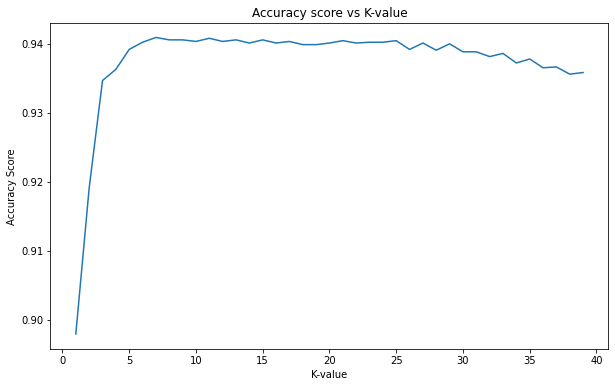

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), acc_score)
plt.title('Accuracy score vs K-value')
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
print("Maximum Accuracy:-",max(acc_score) * 100,"at K =",acc_score.index(max(acc_score)))